In [1]:
%matplotlib inline

In [2]:
import os
import platform
from platform import python_version

import jupyterlab
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

System
os name: posix
system: Darwin
release: 18.7.0

Python
version: 3.7.3

Python Packages
jupterlab==1.1.5
pandas==1.0.0
numpy==1.17.4


In [3]:
plt.rcParams['figure.facecolor'] = 'w'

In [4]:
pd.set_option("display.max_rows", 500)

In [5]:
df = pd.read_csv('~/tds_stories.csv')
df.shape

(21714, 6)

In [6]:
df[(df.title.isnull()) & (df.subtitle.isnull())].shape

(31, 6)

In [7]:
df = df[(df.title.notnull()) | (df.subtitle.notnull())]
df.shape

(21683, 6)

In [8]:
df = df.fillna('')

In [9]:
df['id'] = (df.title + df.subtitle + df.author + df.date + df.reading_time + df.claps).apply(hash)

In [10]:
df[df.id.duplicated()]

,title,subtitle,author,date,reading_time,claps,id


In [11]:
for col in ['title', 'subtitle', 'author', 'date', 'reading_time', 'claps']:
    df[col] = df[col].str.strip()

In [12]:
df.date = pd.to_datetime(df.date)

In [13]:
df = df.rename(columns={'reading_time':'reading_time_str', 'claps': 'claps_str'})

In [14]:
df.loc[df.claps_str == '', 'claps_str'] = '0'

In [15]:
df.loc[:, 'claps'] = df.claps_str.apply(lambda x: float(x.replace('K', ''))*1000 if 'K' in x  else x).astype(int)

In [16]:
df.loc[:, 'reading_time'] = df.reading_time_str.str.replace(' min read', '').apply(int)

In [17]:
df.loc[:, 'daily_rank'] = df.groupby('date').cumcount() + 1

In [18]:
df["daily_count"] = df.groupby("date").daily_rank.transform("count")

In [19]:
df[df.title.str.contains("towards data", case=False)]

,title,subtitle,author,date,reading_time_str,claps_str,id,claps,reading_time,daily_rank,daily_count
1588,Celebrating 1 Year of Towards Data Science,,Cherie Chung,2017-10-20,3 min read,347,-8256182661338044494,347,3,9,11
3202,About Towards Data Science,LAST UPDATED JANUARY 2020,TDS Team,2018-05-05,6 min read,790,-3761786983035070496,790,6,11,16
3512,A Thank You note to Towards Data Science,"Data Science is not easy, but thanks to many p...",Favio Vázquez,2018-06-02,6 min read,572,7827214962442106990,572,6,14,15
4324,Choosing the Best Day to Post on Towards Data ...,,Martin Schleiss,2018-08-11,3 min read,4,4797566435800417393,4,3,13,13
6601,How to get the most out of Towards Data Science?,Our Readers’ Guide,TDS Team,2018-12-13,2 min read,372,4771354627472018483,372,2,13,23
9095,How to create your own column in Towards Data ...,Writers’ Guide,TDS Team,2019-03-29,2 min read,121,6258093081688966286,121,2,8,22
10343,The first step towards Data Science,Basic Concepts involved in Multivariate Analysis,Shubhankar Rawat,2019-05-15,7 min read,294,-5602820424249596544,294,7,25,30
14524,First step towards Data Science: Journey to th...,House price prediction on kaggle,Anish Shrestha,2019-09-28,7 min read,88,3729846168941049990,88,7,21,26
14695,Towards Data-Driven Organization,,Shukhrat Khodjaev,2019-10-03,8 min read,22,2181349394343991018,22,8,11,32
15684,Writing for Towards Data Science: More Than a ...,An intro on how to get started writing for…,Pier Paolo Ippolito,2019-10-31,6 min read,220,5686699054653060259,220,6,22,29


In [20]:
df.columns

Index(['title', 'subtitle', 'author', 'date', 'reading_time_str', 'claps_str',
       'id', 'claps', 'reading_time', 'daily_rank', 'daily_count'],
      dtype='object')

In [21]:
df.loc[:, "daily_perc"] = df.daily_rank / df.daily_count

In [22]:
df

,title,subtitle,author,date,reading_time_str,claps_str,id,claps,reading_time,daily_rank,daily_count,daily_perc
0,How to get started in NLP,,Melanie Tosik,2017-05-01,3 min read,1.8K,-2687214078395011387,1800,3,1,10,0.100000
1,Data Cleaning Web Scraped Job Data,,Michael Salmon,2017-05-01,7 min read,83,5442391382944481526,83,7,2,10,0.200000
2,Reinforcement Learning : Its necessity and cha...,,Ashis Samal,2017-05-01,3 min read,31,8620039918763821418,31,3,3,10,0.300000
3,Tracking a self-driving car with high precision,,Priya Dwivedi,2017-05-01,5 min read,54,1226441970623994698,54,5,4,10,0.400000
4,A Mistake Most Humans Make,,Matt Brems,2017-05-01,5 min read,19,1295033961457500465,19,5,5,10,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
21709,Categorical Encoding Techniques,Methods to encode categorical variables using ...,Tara Boyle,2020-04-04,6 min read,54,-4199123943500876952,54,6,24,28,0.857143
21710,NumPy Array Manipulation,A practical guide to modify the shape of arrays,Soner Yildirim,2020-04-04,4 min read,52,-6902682238967475073,52,4,25,28,0.892857
21711,Monitor Your Dependencies! Stop Being A Blind ...,Reasons for monitoring your model…,Ori Cohen,2020-04-04,4 min read,23,1373197229551170572,23,4,26,28,0.928571
21712,3 Questions You Should Ask Yourself When Creat...,And 3 memes to remember them,Marie Lefevre,2020-04-04,6 min read,17,-8075319494997350328,17,6,27,28,0.964286


In [23]:
#df[(df.date >= '2020-04-01') & (df.date <= '2020-04-30')].sort_values('claps')[::-1]

In [24]:
#df[df.author == 'Roman Orac'].sort_values('daily_rank')

In [25]:
df["title_list"] = df.title.str.split()
df["subtitle_list"] = df.subtitle.str.split()
df["day"] = df.date.dt.day_name()

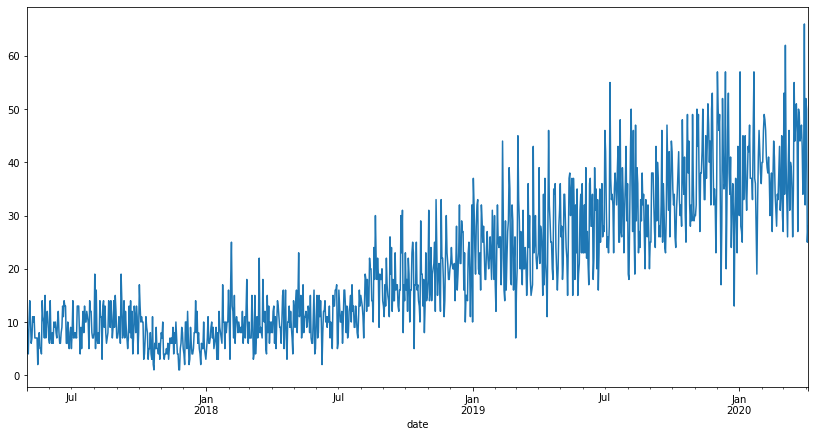

In [26]:
df.groupby("date").daily_rank.max().plot(figsize=(14, 7))

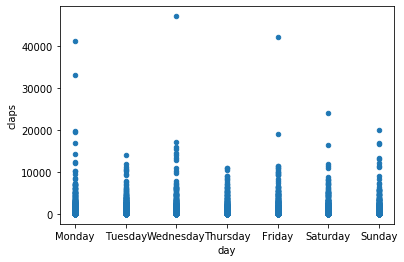

In [27]:
df.plot.scatter(x="day", y="claps")

In [28]:
df[df.date > "2019-01-01"].groupby("day").claps.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,2030.0,258.548768,601.773437,0.0,37.0,102.0,244.00,11000.0
Monday,2553.0,250.032119,518.759064,0.0,39.0,109.0,257.00,10200.0
Saturday,1577.0,250.781864,589.147700,0.0,33.0,101.0,246.00,11800.0
Sunday,1819.0,261.615723,596.420691,0.0,38.0,105.0,252.00,11100.0
Thursday,2154.0,235.472145,532.282819,0.0,37.0,109.0,251.75,10900.0
Tuesday,2327.0,234.853459,566.206293,0.0,34.0,100.0,236.00,11900.0
Wednesday,2249.0,256.584704,749.788115,0.0,37.0,102.0,249.00,17100.0


In [181]:
df_low = df[(df.date > "2019-01-01") & (df.daily_count >= 10) & (df.daily_perc >= 0.8)]
df_low.shape

(3217, 15)

In [182]:
df_low.claps.describe()

count     3217.000000
mean        68.142058
std        299.244825
min          0.000000
25%          8.000000
50%         26.000000
75%         73.000000
max      15800.000000
Name: claps, dtype: float64

In [183]:
df_up = df[(df.date > "2019-01-01") & (df.daily_count >= 10) & (df.daily_perc <= 0.2)]
df_up.shape

(2759, 15)

In [187]:
df[(df.date == '2020-04-04') & (df.daily_perc  >=0.8)].shape

(6, 15)

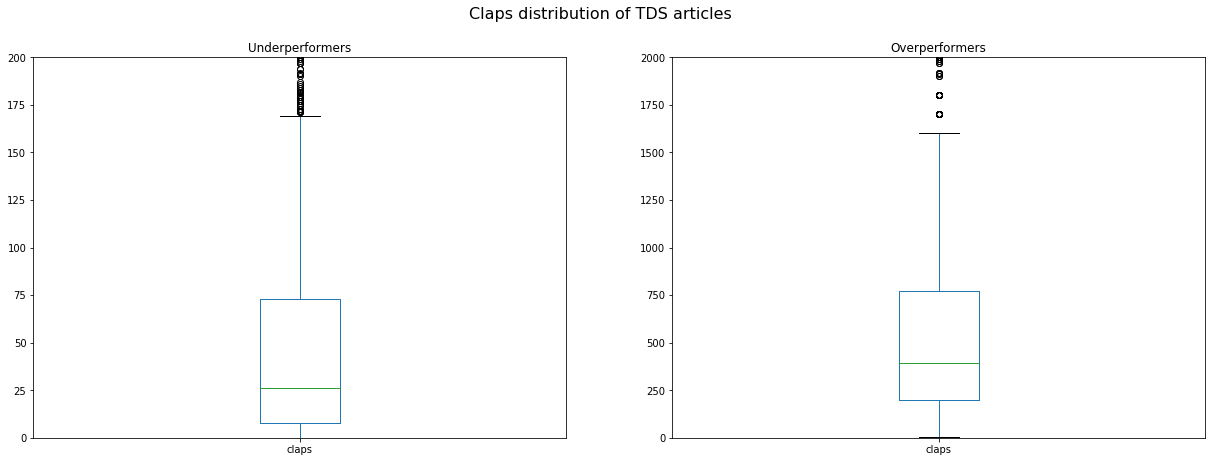

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle("Claps distribution of TDS articles", fontsize=16)

ax[0].set_title("Underperformers")
df_low.claps.plot.box(ax=ax[0], ylim=(0, 200))

ax[1].set_title("Overperformers")
df_up.claps.plot.box(ax=ax[1], ylim=(0, 2000))

In [32]:
df_up.claps.describe()

count     2759.000000
mean       729.817688
std       1165.812661
min          4.000000
25%        201.000000
50%        394.000000
75%        771.000000
max      17100.000000
Name: claps, dtype: float64

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

cv_low = CountVectorizer(ngram_range=(1, 5), max_features=1000000, stop_words=[])
cv_up = CountVectorizer(ngram_range=(1, 5), max_features=1000000, stop_words=[])

In [166]:
cv_low_fit = cv_low.fit_transform(df_low.title.values)
cv_up_fit = cv_up.fit_transform(df_up.title.values)

In [167]:
word_list_low = cv_low.get_feature_names()
count_list_low = cv_low_fit.toarray().sum(axis=0)

In [168]:
word_list_up = cv_up.get_feature_names()
count_list_up = cv_up_fit.toarray().sum(axis=0)

In [169]:
df_freq_low = pd.DataFrame({"n_gram": word_list_low, "n": count_list_low})
df_freq_up = pd.DataFrame({"n_gram": word_list_up, "n": count_list_up})

In [170]:
df_freq_low[df_freq_low.n_gram.str.split().str.len() == 3].sort_values("n")[::-1].head(
    10
).set_index("n_gram")

,n
n_gram,
in data science,18
in machine learning,17
data science and,17
you need to,13
how to use,12
machine learning and,12
and machine learning,11
for machine learning,11
of data science,10


In [152]:
df_freq_up[df_freq_up.n_gram == "for data science"].iloc[0].n

33

In [140]:
df_freq_up[df_freq_up.n_gram.str.split().str.len() == 3].sort_values("n")[::-1].head(10).set_index(
    "n_gram"
)

,n
n_gram,
for data science,33
for data scientists,32
step by step,31
in data science,27
beginner guide to,25
need to know,22
in machine learning,20
you need to,19
how to use,19


In [173]:
df_np = pd.DataFrame(columns=["3-gram", "n"])
bad_tokens = set(
    df_freq_low[df_freq_low.n_gram.str.split().str.len() == 3]
    .sort_values("n")[::-1]
    .head(1009)
    .n_gram.tolist()
)
for token in (
    df_freq_up[df_freq_up.n_gram.str.split().str.len() == 3]
    .sort_values("n")[::-1]
    .head(100)
    .n_gram.tolist()
):
    if token not in bad_tokens:
        df_np = df_np.append(
            {"3-gram": token, "n": df_freq_up[df_freq_up.n_gram == token].iloc[0].n},
            ignore_index=True,
        )

In [174]:
df_np

,3-gram,n
0,beginner guide to,25
1,time series analysis,14
2,every data scientist,13
3,data science job,11
4,data scientist should,10
5,convolutional neural network,10
6,from scratch in,9
7,for time series,9
8,scientist should know,9
9,data scientist interview,8


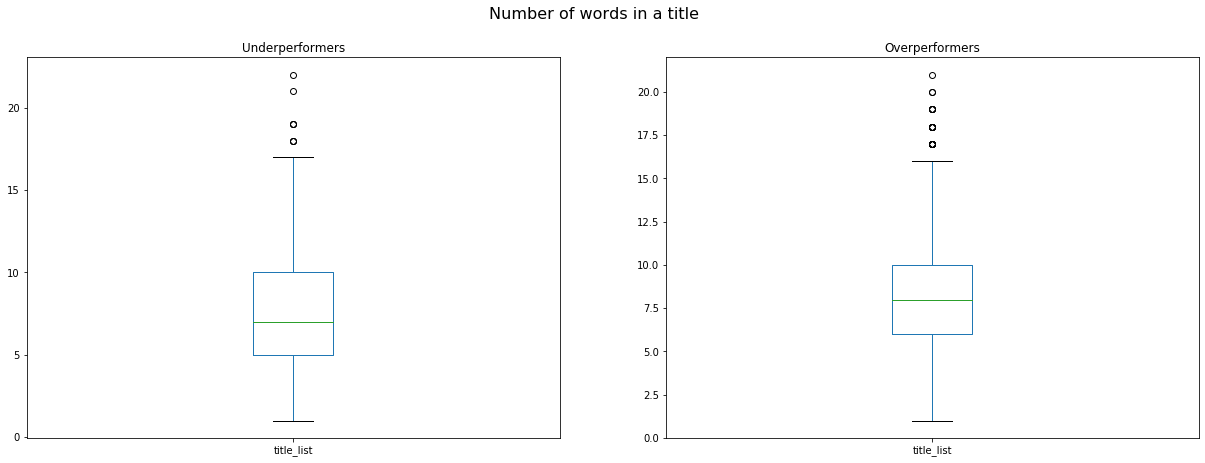

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle("Number of words in a title", fontsize=16)

ax[0].set_title("Underperformers")

df_low.title_list.str.len().plot.box(ax=ax[0])

ax[1].set_title("Overperformers")
df_up.title_list.str.len().plot.box(ax=ax[1])

In [113]:
df_up.title_list.str.len().describe()

count    2759.000000
mean        7.910837
std         3.045942
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        21.000000
Name: title_list, dtype: float64

In [114]:
df_low.title_list.str.len().describe()

count    3217.000000
mean        7.692571
std         3.057744
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        22.000000
Name: title_list, dtype: float64

In [115]:
df_low.subtitle

7032                                                      
7033         Becoming less wrong about the world with data
7034             Let me start with some facts that I have…
7035                                                      
7036        Basic Requirements for (Data-Related) Projects
                               ...                        
21709    Methods to encode categorical variables using ...
21710      A practical guide to modify the shape of arrays
21711                   Reasons for monitoring your model…
21712                         And 3 memes to remember them
21713    This article presents the Multiple Comparison ...
Name: subtitle, Length: 3217, dtype: object

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

cv_low = CountVectorizer(ngram_range=(1, 5), max_features=1000000, stop_words=[])
cv_up = CountVectorizer(ngram_range=(1, 5), max_features=1000000, stop_words=[])

In [117]:
cv_low_fit = cv_low.fit_transform(df_low.subtitle.values)
cv_up_fit = cv_up.fit_transform(df_up.subtitle.values)

In [118]:
word_list_low = cv_low.get_feature_names()
count_list_low = cv_low_fit.toarray().sum(axis=0)

In [119]:
word_list_up = cv_up.get_feature_names()
count_list_up = cv_up_fit.toarray().sum(axis=0)

In [120]:
df_freq_low = pd.DataFrame({"n_gram": word_list_low, "n": count_list_low})
df_freq_up = pd.DataFrame({"n_gram": word_list_up, "n": count_list_up})

In [121]:
df_freq_low[df_freq_low.n_gram.str.split().str.len() == 3].sort_values("n")[::-1].head(
    10
).set_index("n_gram")

,n
n_gram,
learn how to,11
step by step,9
how to use,9
data science in,9
how to build,8
using machine learning,8
one of the,8
science in the,8
in the real,8


In [122]:
df_freq_up[df_freq_up.n_gram.str.split().str.len() == 3].sort_values("n")[::-1].head(10).set_index(
    "n_gram"
)

,n
n_gram,
step by step,33
learn how to,28
how to use,26
one of the,23
of the most,22
on how to,22
you need to,16
by step guide,16
an introduction to,13


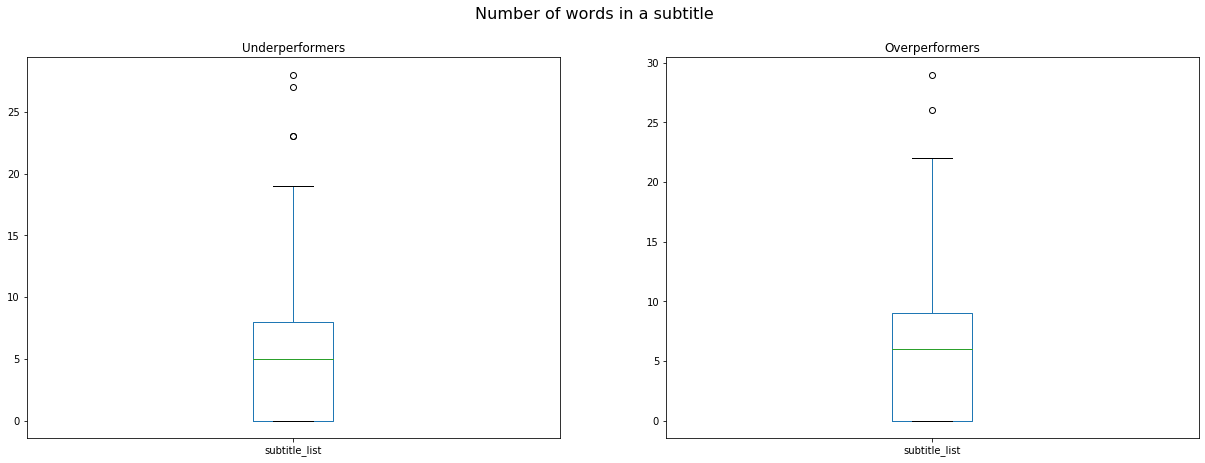

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle("Number of words in a subtitle", fontsize=16)

ax[0].set_title("Underperformers")

df_low.subtitle_list.str.len().plot.box(ax=ax[0])

ax[1].set_title("Overperformers")
df_up.subtitle_list.str.len().plot.box(ax=ax[1])

In [ ]:
d

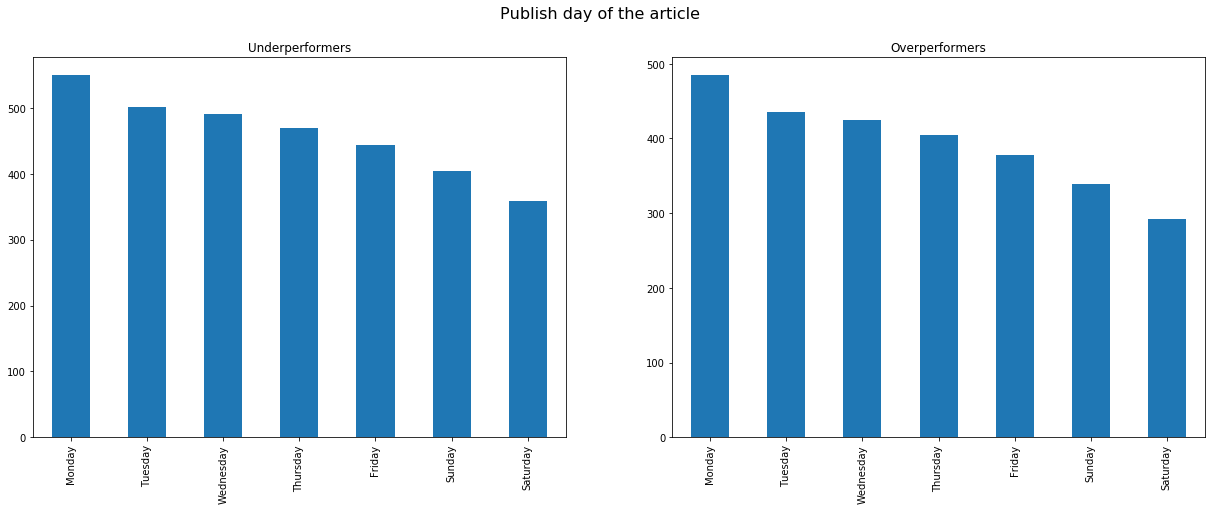

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle("Publish day of the article", fontsize=16)

ax[0].set_title("Underperformers")
df_low.day.value_counts().plot.bar(ax=ax[0])

ax[1].set_title("Overperformers")
df_up.day.value_counts().plot.bar(ax=ax[1])

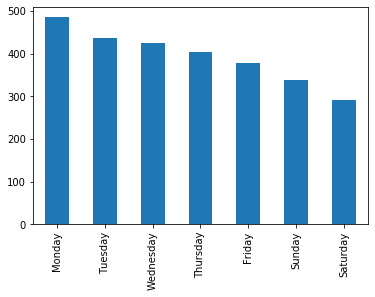

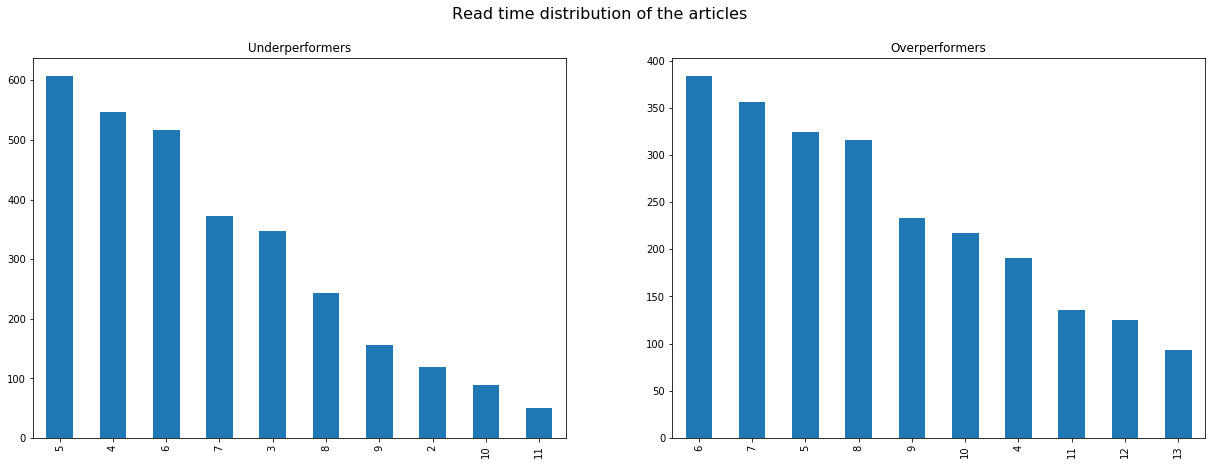

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle("Read time distribution of the articles", fontsize=16)

ax[0].set_title("Underperformers")
df_low.reading_time.value_counts()[:10].plot.bar(ax=ax[0])

ax[1].set_title("Overperformers")
df_up.reading_time.value_counts()[:10].plot.bar(ax=ax[1])